### Importando bilbiotecas e realizando análise exploratória
---

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
df = pd.read_csv("diabetes.csv")

In [90]:
df.shape

(100000, 9)

In [91]:
df.head() 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [92]:
df.tail() 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [94]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [95]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [96]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [97]:

df.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [98]:
df.smoking_history.value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

<Axes: >

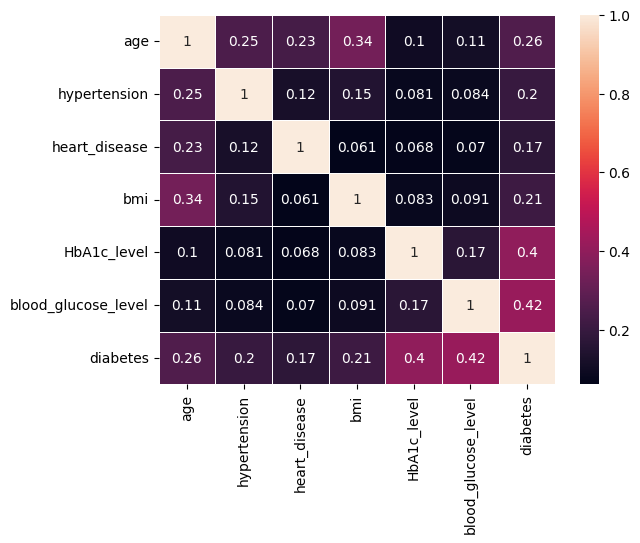

In [99]:

sns.heatmap(df.drop(['gender', 'smoking_history'], axis=1).corr(), annot=True, linewidth=0.5)

### Tratamento de dados
---

In [100]:
df['age'] = df['age'].astype('int32')

In [101]:
def gender_adjust(gender):
    if gender == 'Male':
        return 0
    elif gender == 'Female':
        return 1
    else:
        return 2

In [102]:
df['gender_adjusted'] = df['gender'].apply(gender_adjust)
df.gender_adjusted.value_counts()

gender_adjusted
1    58552
0    41430
2       18
Name: count, dtype: int64

In [103]:
from sklearn.preprocessing import OneHotEncoder

In [104]:
smoking_encoder = OneHotEncoder(handle_unknown='ignore')

In [105]:
smoking_encoder = smoking_encoder.fit(df[['smoking_history']])

In [106]:
smk_transform = smoking_encoder.transform(df[['smoking_history']]).toarray()
smk_columns = smoking_encoder.get_feature_names_out()

In [107]:
smk_data = pd.DataFrame(smk_transform, columns=smk_columns, dtype='int32')
smk_data.head()

,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [108]:
df = pd.concat([df, smk_data], axis=1)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_adjusted,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,Female,80,0,1,never,25.19,6.6,140,0,1,0,0,0,0,1,0
1,Female,54,0,0,No Info,27.32,6.6,80,0,1,1,0,0,0,0,0
2,Male,28,0,0,never,27.32,5.7,158,0,0,0,0,0,0,1,0
3,Female,36,0,0,current,23.45,5.0,155,0,1,0,1,0,0,0,0
4,Male,76,1,1,current,20.14,4.8,155,0,0,0,1,0,0,0,0


In [109]:
final_data = df.drop(['gender', 'smoking_history'], axis=1)

<Axes: >

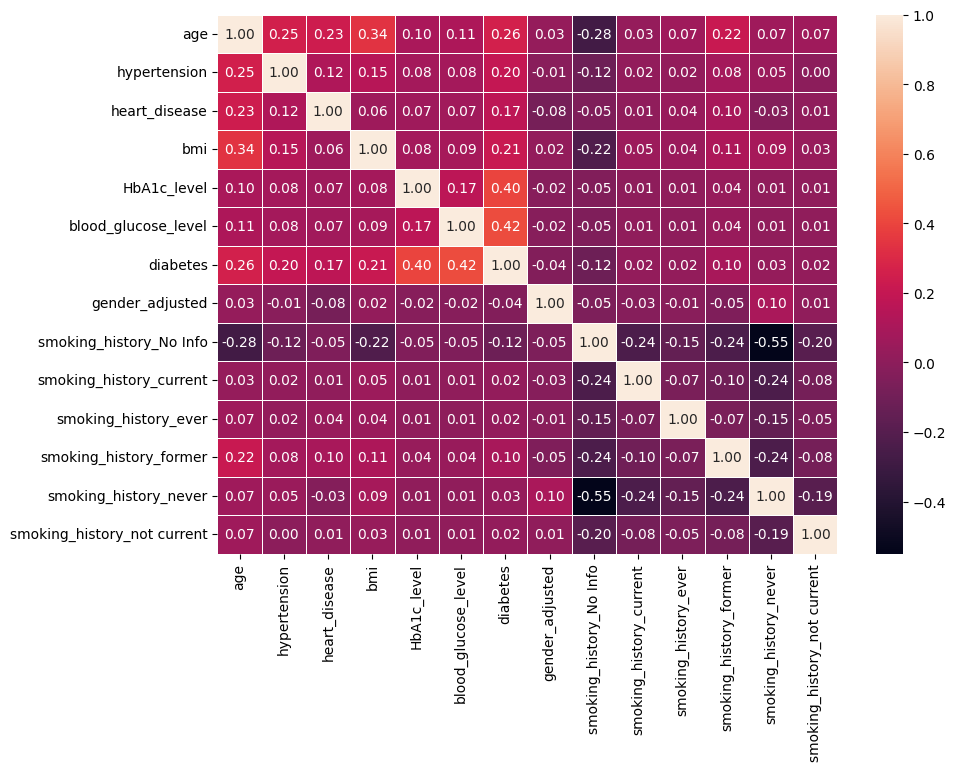

In [110]:
plt.figure(figsize=(10, 7))
sns.heatmap(final_data.corr(), annot=True, fmt=".2f", linewidth=0.5)

### Random Forest
---

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(final_data, final_data["diabetes"], test_size=0.30, random_state=101)

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
randomForest = RandomForestClassifier()

In [115]:
randomForest.fit(X_train, y_train)

RandomForestClassifier()

In [116]:
random_pred = randomForest.predict(X_test)

### Resultados
---

In [117]:
from sklearn.metrics import classification_report,confusion_matrix

In [118]:
print(classification_report(y_test, random_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27475
           1       1.00      1.00      1.00      2525

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [119]:
print(confusion_matrix(y_test, random_pred))

[[27475     0]
 [    0  2525]]


### Hiperparametrização
---

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [122]:
grid = GridSearchCV(estimator=randomForest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [123]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\igorl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
905 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\igorl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\igorl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\igorl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ba

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [124]:
grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [125]:
grid.best_estimator_

RandomForestClassifier(n_estimators=50)

In [126]:
grid_predictions = grid.predict(X_test)

In [127]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27475
           1       1.00      1.00      1.00      2525

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [128]:
print(confusion_matrix(y_test,grid_predictions))

[[27475     0]
 [    0  2525]]
